# Probabilistic Classifier with Naïve Bayes
By Josh Houlding

A Naïve Bayes classifier is not a single algorithm but uses multiple machine learning algorithms to classify data. It not only uses probability, but it is simple to implement. Some real-world examples of its use include filtering spam, classifying documents, text analysis, or medical diagnosis.

# Part 1

To perform sentiment analysis using a Naïve Bayes algorithm, complete the following:
1. Access the resources related to sentiment analysis, located in the topic Resources. Note: There are about 50 datasets that are suitable for use in a sentiment analysis task. For this part of the exercise, you must choose one of these datasets, provided it includes at least 10,000 instances.
2. Ensure that the datasets are suitable for classification using this method.
3. You may search for data in other repositories, such as Data.gov, Kaggle or Scikit Learn.

# Part 2

For your selected dataset, build a classification model as follows:

1. Explain the dataset and the type of information you wish to gain by applying a classification method.
2. Explain the Naïve Bayes algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).
3. Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by applying a classification method using the Naïve Bayes.
6. Choose one of the Naive Bayes types of algorithms: Gaussian Naïve Bayes, Multinomial Naïve Bayes, or Bernoulli Naïve Bayes and explain your reasoning.
7. Split the data into dependent and independent variables (or features and labels).
8. Vectorize the text into numbers.
9. Train the Naïve Bayes classifier on the training set.
10. Make classification predictions.
11. Interpret the results in the context of the questions you asked.
12. Validate your model using a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.
13. Include all mathematical formulas used and graphs representing the final outcomes. <br><br>

<hr style="height:2px">

# <span style="color:#8080ff">Part 1</span>

# Tasks 1.1-1.3
<b>1.1:</b>Access the resources related to sentiment analysis, located in the topic Resources. Note: There are about 50 datasets that are suitable for use in a sentiment analysis task. For this part of the exercise, you must choose one of these datasets, provided it includes at least 10,000 instances.

<b>1.2:</b> Ensure that the datasets are suitable for classification using this method.

<b>1.3:</b> You may search for data in other repositories, such as Data.gov, Kaggle or Scikit Learn. <br>

<b>Dataset Selected:</b> "ChatGPT sentiment analysis" (Kaggle) <br>
<b>Dataset Link:</b> https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis/data

# <span style="color:#1f6635">Part 2</span>

# Task 2.1
<i>Explain the dataset and the type of information you wish to gain by applying a classification method.</i>

The dataset I have chosen for this assignment contains tweets that mention ChatGPT over the period of a month. Exactly which month is not specified, but given that the dataset says it was updated a year ago and is not expected to be updated again, its initial upload was probably a year ago, meaning the data is likely from around May 2023. A classification model powered by a Naive Bayes classifier can help us predict which tweets are positive, negative and neutral in sentiment. 

# Task 2.2
<i>Explain the Naive Bayes algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).</i>

The Naïve Bayes algorithm is an algorithm commonly used for classification tasks within machine learning due to its rapid performance with large datasets. The algorithm is based on Bayes' Theorem, which calculates conditional probabilities, IE "what is the probability of B happening given that A has happened?" 

The general Naïve Bayes formula is as follows:
$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$

In words, the probability of C given X is the product of the probability of X given C and the probability of C divided by the probability of X.

Naïve Bayes assumes the following: 1) All features are assumed to be conditionally independent, and 2) All features have an equal contribution to the outcome. 

The formula for conditional independence of features goes like this: $P(X|C) = P(x_1, x_2, \ldots, x_n | C) = \prod_{i=1}^{n} P(x_i | C)$

This formula expresses that the presence or absence of a specific feature is independent of the presence or absence of any other feature, given the class. 

Naïve Bayes classifiers are frequently used over other methods like K-Nearest Neighbors because of their fast performance as linear classifiers. The assumption of conditional independence ensures far fewer calculations are necessary per step than with KNN, vastly improving performance as the size of the dataset increases.

# Task 2.3
<i>Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.</i>

### Loading and viewing the data

In [46]:
import pandas as pd

df = pd.read_csv("ChatGPT.csv") # Load data

df.head(3) # View data

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral


In [47]:
# Drop redundant column "Unnamed: 0"
df.drop(columns={"Unnamed: 0"}, inplace=True)

# Rename columns
df.rename(columns={"tweets": "tweet", "labels": "label"}, inplace=True)

df.head(3) # View results

,tweet,label
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral


### Displaying the shape of the data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   219294 non-null  object
 1   label   219294 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


The dataset contains almost 220,000 entries, so we will have plenty of data to work with. The columns are simple, with only the tweet contents and sentiment detected (positive, neutral or negative). 

### Checking class balance

label
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64


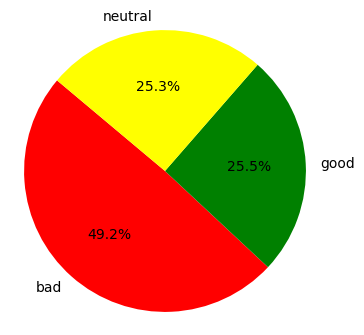

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find label counts
label_counts = df["label"].value_counts()
print(label_counts)

# Define colors for pie chart
colors = {"good": "green", "neutral": "yellow", "bad": "red"}
color_list = [colors[label] for label in label_counts.index]

# Create pie chart of label counts
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140, colors=color_list)
plt.axis("equal")
plt.show()

We see that about half of the total tweets express negative sentiment, with only 25.5% being positive and 25.3% being neutral. This could have an effect on the accuracy of our model down the line, as it will get more training with negative tweets.

### Text length analysis

Descriptive statistics for "length":
median   124.0
count    219294.000000
mean        144.713604
std          80.146339
min           6.000000
25%          80.000000
50%         124.000000
75%         207.000000
max         357.000000
Name: length, dtype: float64


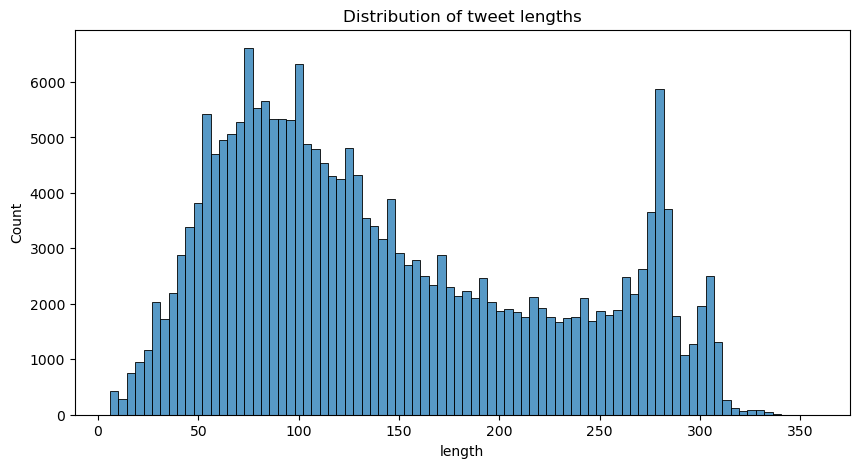

In [50]:
# Find length of tweets
df["length"] = df["tweet"].apply(len)

# Reorganize dataframe
df = df[["tweet", "length", "label"]]

# Show descriptive statistics for tweet lengths
print("Descriptive statistics for \"length\":")
print("median  ", df["length"].median())
print(df["length"].describe())

# Show distribution of tweet lengths
plt.figure(figsize=(10, 5))
sns.histplot(df["length"])
plt.title("Distribution of tweet lengths")
plt.show()

We see that the mean tweet is about 145 characters in length, but the mean is 124 characters, suggesting a skewed distribution. There are also a large number of tweets around the 275-character length, which is intriguing. 

Let's take a look at how the mean and median tweet lengths differ by sentiment: 

In [51]:
# Show mean and median tweet lengths by sentiment
lengths_by_sentiment = df.groupby("label")["length"].agg(["mean", "median"])
print(lengths_by_sentiment)

               mean  median
label                      
bad      120.677316   100.0
good     185.324829   187.0
neutral  150.414764   132.0


On average, tweets expressing good sentiment about ChatGPT are the longest. Many of these could be OpenAI press releases that provide details on new features or improvements, or tweets from excited users wanting to share the LLM's capabilities with their audiences. 

It is also notable that good tweets have an almost normal distribution, while bad and neutral ones have skewed distributions.

# Task 2.4
Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.

### Handling missing values

In [52]:
# Find missing value count
df.isna().sum()

tweet     0
length    0
label     0
dtype: int64

There are no missing values in the data. 

### Removing duplicates

In [53]:
print(f"Length with duplicates: {len(df)}")
print(f"Duplicate count: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Length without duplicates: {len(df)}")

Length with duplicates: 219294
Duplicate count: 1671
Length without duplicates: 217623


### Removing URLs
URLs can introduce noise to the model and don't convey any useful information about sentiment, so they should be removed.

In [54]:
import re

# Function to remove URLs
def remove_urls(string): 
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    return url_pattern.sub(r"", string)

# Remove URLs from tweets
df["tweet"] = df["tweet"].apply(remove_urls)

# Recalculate tweet lengths
df["length"] = df["tweet"].apply(len)

I also considered removing special characters (#, !, ?, etc.), but decided not to because these can contribute useful information about sentiment. For example, a tweet with at least one exclamation point is far less likely to be neutral in sentiment than a tweet without one. 

### Converting all text to lowercase
This helps ensure that uppercase letters do not have any impact on the model.

In [55]:
df["tweet"] = df["tweet"].str.lower()
df.head(3)

,tweet,length,label
0,chatgpt: optimizing language models for dialog...,57,neutral
1,"try talking with chatgpt, our new ai system wh...",116,good
2,chatgpt: optimizing language models for dialog...,218,neutral


### Normalizing tweet lengths

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Normalize tweet lengths with min-max scaler
scaler = MinMaxScaler()
df["length"] = scaler.fit_transform(df[["length"]])
df.head(3)

,tweet,length,label
0,chatgpt: optimizing language models for dialog...,0.166667,neutral
1,"try talking with chatgpt, our new ai system wh...",0.339181,good
2,chatgpt: optimizing language models for dialog...,0.637427,neutral


# Task 2.5
<i>Formulate two questions that can be answered by applying a classification method using the Naïve Bayes.</i>

<b>Question 1:</b> Can we automatically classify tweets about ChatGPT as positive, neutral or negative in sentiment? <br>
<b>Question 2:</b> Can we automatically sort tweets about ChatGPT into categories based on their content?

# Task 2.6
<i>Choose one of the Naive Bayes types of algorithms: Gaussian Naïve Bayes, Multinomial Naïve Bayes, or Bernoulli Naïve Bayes and explain your reasoning.</i>

Multinomial Naïve Bayes is the most appropriate type of Naïve Bayes algorithm for this task, because it assumes that features are either categorical or represent counts (such as word counts in text data). Since we are working with tweets in this dataset, MNB will work nicely.

Multinomial Naïve Bayes is powered by the following formula:
$P(x_i | C) = \frac{N_{C,i} + \alpha}{N_C + \alpha N}$, where:

* $N_{C,i}$ is the number of occurrences of feature i in class C,
* $N_{C}$ is the total count of features in class C, and 
* $\alpha$ is the smoothing parameter for Laplace smoothing.

# Task 2.7
<i>Split the data into dependent and independent variables (or features and labels).</i>

In [57]:
# Show potential features and label
df.head(3)

,tweet,length,label
0,chatgpt: optimizing language models for dialog...,0.166667,neutral
1,"try talking with chatgpt, our new ai system wh...",0.339181,good
2,chatgpt: optimizing language models for dialog...,0.637427,neutral


In [58]:
# Select features and label
features = df.drop(columns={"label"})
label = df["label"]

# Task 2.8
<i>Vectorize the text into numbers.</i>

I have selected TF-IDF (Term Frequency-Inverse Document Frequency) for this task because it considers the frequency of words and applies weights to common and uncommon words, ensuring that the most rare and important words are the ones the model considers most reflective of the tweet's sentiment. This makes it more rigorous than BoW (Bag of Words), which only considers the frequency of words. 

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform tweet column
x_tfidf = vectorizer.fit_transform(df["tweet"])

# Task 2.9
<i>Train the Naïve Bayes classifier on the training set.</i>

Before this can be done, we must perform a train-test split on the dataset.

In [60]:
from sklearn.model_selection import train_test_split

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, label, test_size=0.2, random_state=42)

Now the Naive Bayes model can be created and fit to the data: 

In [61]:
from sklearn.naive_bayes import MultinomialNB

# Initialize multinomial NB classifier
classifier = MultinomialNB()

# Train classifier
classifier.fit(x_train, y_train)

MultinomialNB()

# Task 2.10
Make classification predictions.

In [62]:
# Generate predictions
y_pred = classifier.predict(x_test)

# Create dataframe of predictions vs. actual values
prediction_vs_actual = pd.DataFrame({
    "prediction": y_pred, 
    "actual": y_test
})

prediction_vs_actual.transpose().head()

,116093,100810,101155,95192,158112,190510,29579,34993,22374,143480,...,48689,144905,47913,108414,152103,195970,94358,138725,114388,134634
prediction,bad,good,bad,good,bad,bad,good,good,neutral,bad,...,bad,neutral,good,bad,bad,neutral,bad,bad,good,bad
actual,bad,good,bad,good,bad,good,good,good,neutral,bad,...,bad,neutral,good,neutral,bad,good,bad,neutral,good,bad


In [63]:
# Find number of correct predictions
correct_prediction_count = len(prediction_vs_actual[prediction_vs_actual["prediction"] == prediction_vs_actual["actual"]])

# Find percentage of correct predictions
accuracy = (correct_prediction_count / len(y_test)) * 100

print(f"Number of test entries: {len(y_test)}")
print(f"Number of correct predictions: {correct_prediction_count}")
print(f"Accuracy: {round(accuracy, 2)}%")

Number of test entries: 43525
Number of correct predictions: 31079
Accuracy: 71.4%


# Task 2.11
<i>Interpret the results in the context of the questions you asked.</i>

Our accuracy score indicates that the classifier correctly predicts the sentiment of about 7 out of every 10 tweets. This means that the answer to the first question we asked is "yes, we can automatically assign sentiment to tweets about ChatGPT with a Naive Bayes classifier".

The second question, which involves asking whether the tweets can be grouped into categories based on their content, cannot be answered yet, because it would require building a clustering model that auto-generates categories/clusters to sort tweets into, which is beyond the scope of this assignment and any other assignment we have done in this class thus far. 

# Task 2.12
Validate your model using a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.

### Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Find order of label values
print(f"Label order: {classifier.classes_}")
print()
print("Confusion matrix:")
print()

# Print confusion matrix
print(cm)

Label order: ['bad' 'good' 'neutral']

Confusion matrix:

[[20554   486   496]
 [ 1961  7469  1653]
 [ 5622  2228  3056]]


The labeled matrix is as follows: 
<table>
    <tr>
        <td></td>
        <td>predicted bad</td>
        <td>predicted good</td>
        <td>predicted neutral</td>
    </tr>
    <tr>
        <td>actual bad</td>
        <td>20,554</td>
        <td>486</td>
        <td>496</td>
    </tr>
    <tr>
        <td>actual good</td>
        <td>1,961</td>
        <td>7,469</td>
        <td>1,653</td>
    </tr>
    <tr>
        <td>actual neutral</td>
        <td>5,622</td>
        <td>2,228</td>
        <td>3,056</td>
    </tr>
    </table>

We can see that the the two largest values were tweets that were predicted to be bad and were actually bad, and tweets that were predicted to be good and were actually good. This provides further evidence that the model is accurate in its classifications.

### Accuracy score
The accuracy score was determined earlier to be ~74.1%, meaning that on average, the model correctly classified a tweet's sentiment about 71.4% of the time, far better than what we would get with random guessing in a classification problem like this with 3 classes (33%). 

### ROC-AUC curves
Generating ROC-AUC curves for a model built to handle a classification problem with more than 2 classes is complex and computationally intensive, so we will direct our focus toward other more straighforward evaluation metrics, such as the accuracy score and confusion matrix.

### K-fold cross-validation

In [65]:
from sklearn.model_selection import cross_val_score

# Calculate k-fold cross-validation scores
scores = cross_val_score(classifier, x_tfidf, df["label"], cv=5, scoring="accuracy")

In [66]:
# Show cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", round(scores.mean(), 3),"\n")

Cross-validation scores: [0.70731763 0.70690408 0.69782883 0.69669608 0.69671905]
Mean score: 0.701 



The mean cross-validation score from 5 iterations is 0.701, indicating that the NB classifier we have built correctly predicts the sentiment of tweets about 70.1% of the time. This is slightly lower than the accuracy score we calculated earlier, but still impressive, and confirms the notion that tweet sentiment can be accurately predicted with a Naive Bayes classifier. 

# Task 2.13
<i>Include all mathematical formulas used and graphs representing the final outcomes.</i>

All relevant formulas and graphs have been included in their respective tasks.

# References
GeeksforGeeks. (2024b, March 1). Naive Bayes classifiers. GeeksforGeeks. https://www.geeksforgeeks.org/naive-bayes-classifiers/ <br>
A practical explanation of a Naive Bayes classifier. (2017, May 25). MonkeyLearn Blog. https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/ <br>
ChatGPT. (n.d.). https://chat.openai.com/ <br>
Gemini. (n.d.). https://gemini.google.com/app <br>